#### Practical 1 --- Implement Feed-forward Neural Network and train the network with different optimizers and compare the results

In [2]:
%%time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train.reshape(-1, 28*28) / 255.0, x_test.reshape(-1, 28*28) / 255.0
# Split training into train/val for tuning
X_train, X_val, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# Define search space
param_grid = {
"neurons": [64, 128],
"activation": ['relu', 'tanh'],
"optimizer": ['adam', 'sgd'],
"batch_size": [64],
"epochs": [5]
}
# Track best model
best_acc = 0
best_params = {}
# Manual grid search
for neurons in param_grid["neurons"]:
    for activation in param_grid["activation"]:
        for optimizer in param_grid["optimizer"]:
            for batch_size in param_grid["batch_size"]:
                for epochs in param_grid["epochs"]:
                    print(f"Training model: neurons={neurons}, activation={activation}, optimizer={optimizer}")
                    # Build model
                    model = keras.Sequential([
                    layers.Dense(neurons, activation=activation, input_shape=(784,)),
                    layers.Dense(64, activation=activation),
                    layers.Dense(10, activation='softmax')
                    ])
                    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
                    # Train
                    model.fit(X_train, y_train_split, epochs=epochs, batch_size=batch_size, verbose=0)
                    # Validate
                    val_loss, val_acc = model.evaluate(X_val, y_val_split, verbose=0)
                    print(f"Validation Accuracy: {val_acc:.4f}")
                    if val_acc > best_acc:
                        best_acc = val_acc
                        best_params = {
                        "neurons": neurons,
                        "activation": activation,
                        "optimizer": optimizer,
                        "batch_size": batch_size,
                        "epochs": epochs
                    }
# Final results
print("\nBest Hyperparameters:")
print(best_params)
print(f"Best Validation Accuracy: {best_acc:.4f}")

Training model: neurons=64, activation=relu, optimizer=adam


C:\Users\muati\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation Accuracy: 0.9708
Training model: neurons=64, activation=relu, optimizer=sgd
Validation Accuracy: 0.9211
Training model: neurons=64, activation=tanh, optimizer=adam
Validation Accuracy: 0.9674
Training model: neurons=64, activation=tanh, optimizer=sgd
Validation Accuracy: 0.9185
Training model: neurons=128, activation=relu, optimizer=adam
Validation Accuracy: 0.9752
Training model: neurons=128, activation=relu, optimizer=sgd
Validation Accuracy: 0.9258
Training model: neurons=128, activation=tanh, optimizer=adam
Validation Accuracy: 0.9728
Training model: neurons=128, activation=tanh, optimizer=sgd
Validation Accuracy: 0.9199

Best Hyperparameters:
{'neurons': 128, 'activation': 'relu', 'optimizer': 'adam', 'batch_size': 64, 'epochs': 5}
Best Validation Accuracy: 0.9752
CPU times: total: 25.6 s
Wall time: 52.5 s


#### Pracitcal 2 --- Write a Program to implement regularization to prevent the model from overfitting

In [4]:
%%time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # Normalize the data
# Define the Neural Network Model with L2 Regularization and Dropout
model = keras.Sequential([
layers.Flatten(input_shape=(28, 28)), # Flatten the 28x28 images
layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)), # L2 Regularization
layers.Dropout(0.3), # Dropout to prevent overfitting - Dropout with 30% rate
layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
layers.Dropout(0.3),
layers.Dense(10, activation='softmax') # Output layer with 10 classes
])
# Compile the Model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# Define Early Stopping
early_stopping = EarlyStopping(
monitor='val_loss', # Monitor validation loss
patience=3, # Stop training if no improvement for 3 epochs
restore_best_weights=True # Restore best model weights after stopping
)
model.summary()
# Train the Model with Early Stopping
history = model.fit(x_train, y_train, epochs=50, batch_size=128, 
validation_data=(x_test, y_test),
callbacks=[early_stopping]) # Apply early stopping
# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

C:\Users\muati\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7985 - loss: 1.0334 - val_accuracy: 0.9537 - val_loss: 0.3818
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9422 - loss: 0.4065 - val_accuracy: 0.9656 - val_loss: 0.2782
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9539 - loss: 0.3097 - val_accuracy: 0.9665 - val_loss: 0.2466
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9587 - loss: 0.2748 - val_accuracy: 0.9713 - val_loss: 0.2169
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9612 - loss: 0.2520 - val_accuracy: 0.9735 - val_loss: 0.2035
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9654 - loss: 0.2359 - val_accuracy: 0.9721 - val_loss: 0.2040
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9645 - loss: 0.2326 - val_accuracy: 0.9756 - val_loss: 0.1960
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9658 - loss: 0.2285 - val_accuracy: 0.

#### Practical 3 --- Implement deep learning for recognizing classes for datasets like CIFAR-10 images

C:\Users\muati\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3195 - loss: 1.8606
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5154 - loss: 1.3520
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5646 - loss: 1.2269
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5952 - loss: 1.1490
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6129 - loss: 1.0895
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6170 - loss: 1.1038
Test accuracy: 0.6086999773979187
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


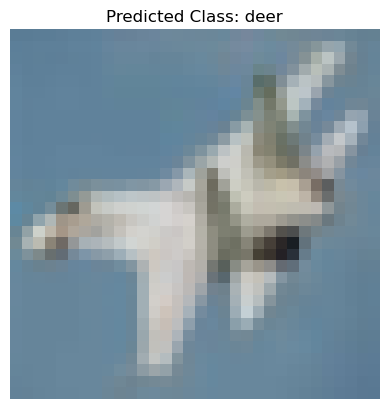

Predicted Probabilities: [[3.1295505e-01 4.9359765e-04 2.3882553e-01 3.5532866e-02 3.3989024e-01
  3.7430584e-02 1.1769653e-02 6.2646256e-03 1.6714092e-02 1.2372911e-04]]
CPU times: total: 22.2 s
Wall time: 17.4 s


In [6]:
%%time
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
# Class labels for CIFAR-10
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']
# Define the CNN model architecture with padding
model = Sequential([
Conv2D(32, (3, 3), activation='relu', padding='same',strides=2, input_shape=(32, 32, 3)),
MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu', padding='same',strides=2),
MaxPooling2D((2, 2)),
Flatten(),
Dense(128, activation='relu'),
Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64)
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")
7
# Choose a single image from the test set
index = 10 # Replace with the index of the image you want to use
single_image = x_test[index:index+1]
# Get the predicted probabilities for the single image
predicted_probabilities = model.predict(single_image)
# Get the predicted class (index with highest probability)
predicted_class = np.argmax(predicted_probabilities)
predicted_label = class_labels[predicted_class]
# Display the input image
plt.imshow(single_image.reshape(32, 32, 3))
plt.title(f"Predicted Class: {predicted_label}")
plt.axis('off')
plt.show()
# Display the predicted probabilities
print("Predicted Probabilities:", predicted_probabilities)

#### Practical 4 --- : Implement deep learning for the Prediction of the autoencoder from the test data

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0992 - val_loss: 0.0406
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0367 - val_loss: 0.0266
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0255 - val_loss: 0.0219
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0219 - val_loss: 0.0197
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0195 - val_loss: 0.0178
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0181 - val_loss: 0.0167
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0168 - val_loss: 0.0156
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0158 - val_loss: 0.0149
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0151 - val_loss: 0.0143
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0145 - val_loss: 0.0137
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step


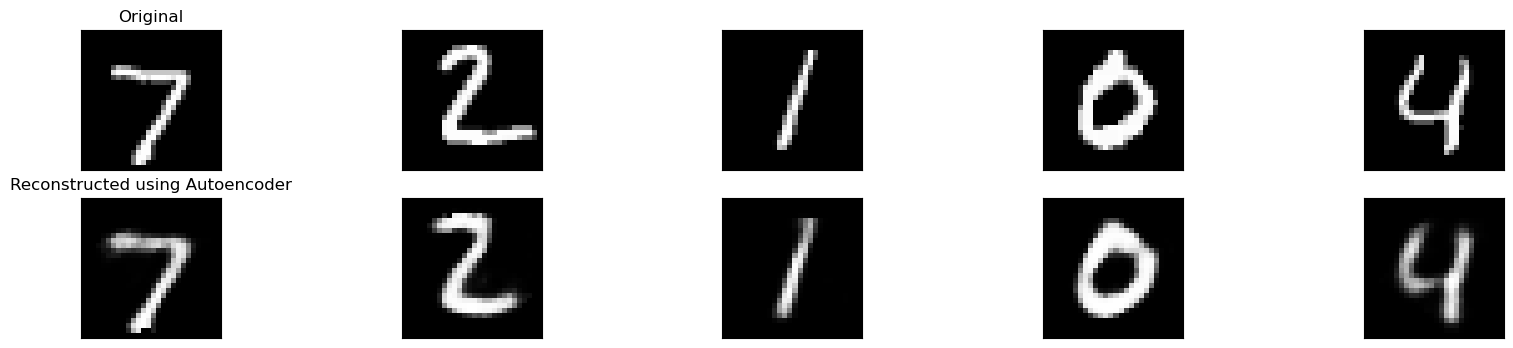

CPU times: total: 10.6 s
Wall time: 13.8 s


In [8]:
%%time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and Preprocess Data
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# Reshape images to be flat vectors
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# 2. Define Autoencoder Model
# Encoder
input_img = keras.Input(shape=(784,)) # 28 * 28 = 784
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded) # Bottleneck layer
# Decoder
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded) # Output layer
# Autoencoder model
autoencoder = keras.Model(input_img, decoded)
# 3. Compile and Train
autoencoder.compile(optimizer='adam', loss='mse') # Mean Squared Error loss for reconstruction
# Train the autoencoder
autoencoder.fit(x_train, x_train,
epochs=10,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))
# 4. Predict/Reconstruct
decoded_imgs = autoencoder.predict(x_test)
# 5. Visualize Results
n = 5 # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0: # Add title only for the first image in the row
        ax.set_title('Original')
    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0: # Add title only for the first image in the row
        ax.set_title('Reconstructed using Autoencoder')

plt.show()

#### Practical 5 --- Implement Convolutional Neural Network for Digit Recognition on the MNIST Dataset

Training the model...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8966 - loss: 0.3611 - val_accuracy: 0.9828 - val_loss: 0.0544
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9838 - loss: 0.0539 - val_accuracy: 0.9855 - val_loss: 0.0418
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9886 - loss: 0.0365 - val_accuracy: 0.9905 - val_loss: 0.0305
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9905 - loss: 0.0302 - val_accuracy: 0.9891 - val_loss: 0.0313
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9931 - loss: 0.0216 - val_accuracy: 0.9898 - val_loss: 0.0303
Training finished.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9869 - loss: 0.0385
Test accuracy: 0.989799976348877
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


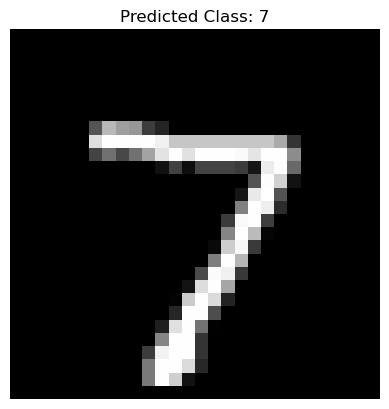

Predicted Probabilities: [[3.3969769e-10 6.9257022e-12 3.9193232e-08 1.7179959e-08 3.7162553e-13
  5.6127034e-12 2.1499493e-18 1.0000000e+00 1.1804865e-10 2.5490232e-09]]
CPU times: total: 49.9 s
Wall time: 43.7 s


In [10]:
%%time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize the images to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0
# Reshape the data to add a channel dimension (required for Conv2D)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# Define the CNN model architecture
model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D((2, 2)),
Flatten(),
Dense(10, activation='softmax') # Output layer with 10 classes for digits 0-9
])
# Compile the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
# Train the model
print("Training the model...")
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
print("Training finished.")
13
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")
# --- Prediction on a single image ---
# Choose a single image from the test set
index = 0 # You can change this index to choose a different image
single_image = np.expand_dims(x_test[index], axis=0) # Add a batch dimension
# Get the predicted probabilities for the single image
predicted_probabilities = model.predict(single_image)
predicted_class = np.argmax(predicted_probabilities)
# Display the input image and predicted class
plt.imshow(single_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off') # Hide the axes
plt.show()
# Display the predicted probabilities
print("Predicted Probabilities:", predicted_probabilities)

#### Practical 6 --- Write a program to implement Transfer Learning on the suitable dataset (e.g. classify the cats versus dogs dataset from Kaggle).

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Top 5 predictions:
1: tabby (48.92%)
2: tiger_cat (44.88%)
3: Egyptian_cat (2.56%)
4: lens_cap (0.42%)
5: ping-pong_ball (0.25%)


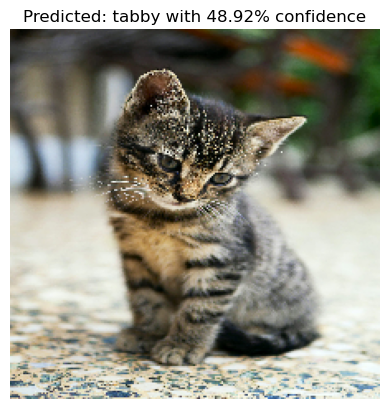

CPU times: total: 2.17 s
Wall time: 2.97 s


In [12]:
%%time
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
# Step 1: Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet') # Pre-trained on ImageNet
# Step 2: Load and preprocess the input image
img_path = 'cat.jpg' # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224)) # Resize image to 224x224
# Convert the image to a NumPy array
img_array = image.img_to_array(img)
# Add a batch dimension (since the model expects a batch of images)
img_array = np.expand_dims(img_array, axis=0)
# Preprocess the image using the ResNet50 preprocessing function
img_array = preprocess_input(img_array)
# Step 3: Run inference on the preprocessed image
predictions = model.predict(img_array)
# Decode the predictions (returns the top 5 predicted classes)
decoded_predictions = decode_predictions(predictions, top=5)
# Step 4: Display the top 5 predictions
print('Top 5 predictions:')
for i, (imagenet_id, label, score) in enumerate(decoded_predictions[0]):
    print(f'{i+1}: {label} ({score * 100:.2f}%)')
    
# Step 5: Display the input image and prediction
plt.imshow(image.load_img(img_path, target_size=(224, 224)))
plt.title(f"Predicted: {decoded_predictions[0][0][1]} with {decoded_predictions[0][0][2] * 100:.2f}% confidence")
plt.axis('off')
plt.show()

#### Practical 7 --- Write a program for the Implementation of a Generative Adversarial Network for generating synthetic shapes (like digits)

In [14]:
%%time
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
# Setup
device = torch.device("cuda")
z_dim = 100
image_size = 28
# Data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
loader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=True)
# Generator
class Generator(nn.Module):
    def __init__(self, z_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose2d(z_dim, 256, 7, 1, 0, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 1, 4, 2, 1, bias=False),
            nn.Tanh()
        )
    def forward(self, z):
        return self.net(z)
# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)
# Initialize models
G = Generator(z_dim).to(device)
D = Discriminator().to(device)
# Optimizers and Loss
loss_fn = nn.BCELoss()
opt_G = torch.optim.Adam(G.parameters(), lr=2e-4, betas=(0.5, 0.999))
opt_D = torch.optim.Adam(D.parameters(), lr=2e-4, betas=(0.5, 0.999))
# Visualization helper
def show_generated_images(images, scores, title):
    images = images.cpu().detach()
    scores = scores.cpu().detach().numpy().flatten()
    fig, axes = plt.subplots(1, 4, figsize=(6, 6))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i][0], cmap='gray')
        ax.set_title(f"D: {scores[i]:.2f}")
        ax.axis('off')
    plt.suptitle(title)
    # plt.tight_layout()
    plt.show()
    
# Training Loop
for epoch in range(10): # More epochs = clearer images
    for i, (real_imgs, _) in enumerate(loader):
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)
        # === Train Discriminator ===
        z = torch.randn(batch_size, z_dim, 1, 1).to(device)
        fake_imgs = G(z)
        D_real = D(real_imgs)
        D_fake = D(fake_imgs.detach())
        loss_D = loss_fn(D_real, real_labels) + loss_fn(D_fake, fake_labels)
        opt_D.zero_grad()
        loss_D.backward()
        opt_D.step()
        # === Train Generator ===
        z = torch.randn(batch_size, z_dim, 1, 1).to(device)
        fake_imgs = G(z)
        D_fake = D(fake_imgs)
        loss_G = loss_fn(D_fake, real_labels) # Try to fool D
        opt_G.zero_grad()
        loss_G.backward()
        opt_G.step()
        # === Visualize every 200 steps ===
        if i % 400 == 0:
            test_z = torch.randn(4, z_dim, 1, 1).to(device)
            test_imgs = G(test_z)
            test_scores = D(test_imgs)
            print(f"Epoch {epoch} Step {i} | D Loss: {loss_D.item():.4f} | G Loss: {loss_G.item():.4f}")
            show_generated_images(test_imgs, test_scores, title=f"Epoch {epoch}, Step {i}")

AssertionError: Torch not compiled with CUDA enabled

#### Practical 8 --- Write a program to implement a simple form of a recurrent neural network. 

In [16]:
%%time
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, SimpleRNN, TimeDistributed, Dense
# Example input sequence
input_text = [
"brown fox jumps over",
"fox jumps over the",
"jumps over the lazy",
"over the lazy dog"
]
# Tokenize input text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(input_text)
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary size:", vocab_size)
# Convert input text to sequences
input_sequences = tokenizer.texts_to_sequences(input_text)
# Pad input sequences
max_len = max(len(seq) for seq in input_sequences)
padded_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='post')
print("Padded input sequences:", padded_sequences)
# Define Bi-RNN model
model = Sequential([
Embedding(input_dim=vocab_size, output_dim=10, input_length=max_len-1),
Bidirectional(SimpleRNN(64, return_sequences=True)),
Bidirectional(SimpleRNN(64, return_sequences=True)),
TimeDistributed(Dense(vocab_size, activation='softmax'))
])
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Train the model
X_data = padded_sequences[:, :-1] # Input data (remove last word from each sequence)
y_data = padded_sequences[:, 1:] # Output data (remove first word from each sequence)
for epoch in range(1, 101):
    history =model.fit(X_data, y_data, epochs=1, verbose=0)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/100, Loss: {history.history['loss'][0]:.4f}")
# Print input sequences and padded input sequences
print("Input sequences:", input_text)
print("Padded input sequences:", padded_sequences)
# Verify vocabulary size and index-word mapping
print("Vocabulary size:", vocab_size)
print("Index-word mapping:", tokenizer.index_word)
# Inspect the model's architecture
print(model.summary())
# Function to generate next word prediction
def predict_next_word(input_text):
    input_seq = tokenizer.texts_to_sequences([input_text])
    padded_input_seq = pad_sequences(input_seq, maxlen=max_len-1, padding='post')
    predicted_probs = model.predict(padded_input_seq)
    predicted_index = np.argmax(predicted_probs[0][-1])
    predicted_word = tokenizer.index_word.get(predicted_index, "<Unknown>")
    return predicted_word
# Generate next word predictions
for text in input_text:
    predicted_word = predict_next_word(text)
    print(f"Input: {text}, Predicted next word: {predicted_word}")

Vocabulary size: 8
Padded input sequences: [[6 4 2 1]
 [4 2 1 3]
 [2 1 3 5]
 [1 3 5 7]]


C:\Users\muati\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 10/100, Loss: 1.5382
Epoch 20/100, Loss: 0.6697
Epoch 30/100, Loss: 0.0941
Epoch 40/100, Loss: 0.0125
Epoch 50/100, Loss: 0.0042
Epoch 60/100, Loss: 0.0025
Epoch 70/100, Loss: 0.0019
Epoch 80/100, Loss: 0.0016
Epoch 90/100, Loss: 0.0015
Epoch 100/100, Loss: 0.0013
Input sequences: ['brown fox jumps over', 'fox jumps over the', 'jumps over the lazy', 'over the lazy dog']
Padded input sequences: [[6 4 2 1]
 [4 2 1 3]
 [2 1 3 5]
 [1 3 5 7]]
Vocabulary size: 8
Index-word mapping: {1: 'over', 2: 'jumps', 3: 'the', 4: 'fox', 5: 'lazy', 6: 'brown', 7: 'dog'}


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 3, 10)               │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 3, 128)              │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 3, 128)              │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 3, 8)                │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106,250 (415.04 KB)

 Trainable params: 35,416 (138.34 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 70,834 (276.70 KB)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
Input: brown fox jumps over, Predicted next word: the
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Input: fox jumps over the, Predicted next word: lazy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Input: jumps over the lazy, Predicted next word: dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Input: over the lazy dog, Predicted next word: the
CPU times: total: 6.89 s
Wall time: 10.4 s


#### Practical 9 --- Implement LSTM for sentiment analysis on datasets like UMICH SI650 for similar.

Number of training samples: 25000
Number of test samples: 25000
Sample review (word IDs) total Length: 218
Sample sentiment: 1


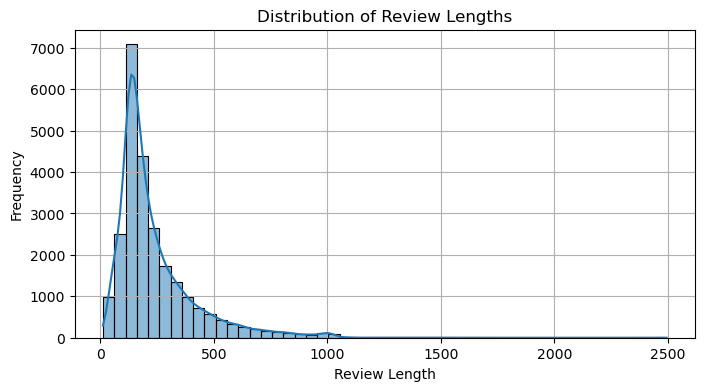

C:\Users\muati\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 232ms/step - accuracy: 0.6630 - loss: 0.5764 - val_accuracy: 0.8658 - val_loss: 0.3375
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.8960 - loss: 0.2668

In [ ]:
%%time
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
# Step 2: Load Dataset
num_words = 10000 # use top 10,000 frequent words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)
# Step 3: EDA - Explore the Data
print("Number of training samples:", len(X_train))
print("Number of test samples:", len(X_test))
# Show first review (as integers)
print("Sample review (word IDs) total Length:", len(X_train[0]))
print("Sample sentiment:", y_train[0])
# Length distribution of reviews
review_lengths = [len(x) for x in X_train]
plt.figure(figsize=(8, 4))
sns.histplot(review_lengths, bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
# Step 4: Preprocess the Data (Padding)
maxlen = 200
X_train_padded = pad_sequences(X_train, maxlen=maxlen)
X_test_padded = pad_sequences(X_test, maxlen=maxlen)

# Step 5: Build LSTM Model
model = Sequential([
Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
LSTM(128),
Dropout(0.5),
Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
# Step 6: Train the Model
history = model.fit(
X_train_padded, y_train,
validation_split=0.2,
epochs=3,
batch_size=128,
verbose=1
)
# Step 7: Plot Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Val")
plt.title("Accuracy over Epochs")
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Val")
plt.title("Loss over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Step 8: Evaluate on Test Set
loss, acc = model.evaluate(X_test_padded, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")
# Step 9: Classification Report
y_pred = (model.predict(X_test_padded) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
# Step 10: Sample Predictions
word_index = imdb.get_word_index()
index_to_word = {index + 3: word for word, index in word_index.items()}
index_to_word[0] = "<PAD>"
index_to_word[1] = "<START>"
index_to_word[2] = "<UNK>"
index_to_word[3] = "<UNUSED>"

def decode_review(encoded_review):
    return " ".join([index_to_word.get(i, "?") for i in encoded_review])

print("\n Sample Predictions:\n")
for i in range(5):
    review = decode_review(X_test[i])
    prediction = "Positive" if y_pred[i][0] == 1 else "Negative"
    actual = "Positive" if y_test[i] == 1 else "Negative"
    print(f"Review {i+1}:")
    print(f"Text: {review[:300]}...")
    print(f"Prediction: {prediction} | Actual: {actual}")
    print("-" * 80)

#### Practical 10 --- Write a program for object detection from the image/video

In [ ]:
%%time
!pip install -q ultralytics
from ultralytics import YOLO
import cv2
# Load a pretrained YOLOv8 model (e.g., yolov8n - nano, fast & small)
model = YOLO('yolov8n.pt') # You can use 'yolov8s.pt', 'yolov8m.pt', etc.
# Load your image (replace 'image.jpg' with your image file)
img_path = 'road.jpg'
image = cv2.imread(img_path)
# Run inference (object detection)
results = model(img_path)
# Show the results with bounding boxes
results[0].show() # Opens a window with detected objects
# Optional: Save results image with bounding boxes
results[0].save(filename='result.jpg')
print("Detection completed and saved as result.jpg")